Разделим данные по id водителей

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas
import matplotlib.pyplot as plt
from datetime import datetime as dt

data = pandas.read_csv('data1.tsv', sep="\t")

drivers_data = []

date_fmt = "%Y-%m-%d %H:%M:%S"

for i in data["id"].unique():
    str_dates = data[data["id"] == i]["date"]
    
    lat = [l for l in data[data["id"] == i]["latitude"]]
    lon = [l for l in data[data["id"] == i]["longitude"]]
    timestamps = [dt.strptime(str_date, date_fmt) for str_date in str_dates]
    
    drivers_data.append([lat, lon, timestamps])

Разбиваем все точки на отдельные круги.

In [2]:
from split_rounds import split_rounds

rounds = []
        
for xs, ys, timestamps in drivers_data:
    driver_rounds = split_rounds(xs, ys, timestamps)
    rounds.extend(driver_rounds)
    
    
    

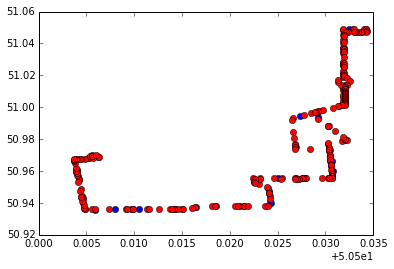

In [3]:
xs, ys, ts = zip(*rounds[0])
plt.plot(xs, ys, 'o', c ='b')
xs, ys, ts = zip(*rounds[7])
plt.plot(xs, ys, 'o', c = 'r')

Этот график проверка, что данные отделяются верно. Ещё не много стоит его доработать.

In [4]:
from split_rounds import mean_stay

mean_stays_rounds = mean_stay(rounds)
print(len(mean_stays_rounds), len (rounds))

15 55


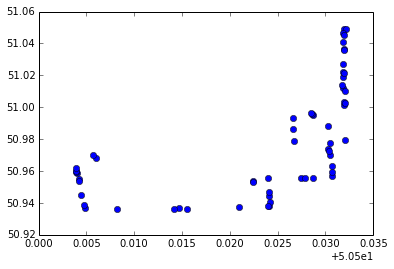

In [7]:
xs, ys, ts = zip(*mean_stays_rounds[0])
plt.plot(xs, ys, 'o', c ='b')

In [100]:
from speed import find_speed

speed = []
for i in mean_stays_rounds:
    xs, ys, ts = zip(*i)
    speed.append(find_speed(xs, ys, ts))

In [101]:
print(len(speed), len(xs))

15 66


In [105]:
from speed import mean_speed

mean_speeds_rounds = mean_speed(speed, mean_stays_rounds)

[((50.505977000000001, 50.968392999999999, datetime.datetime(2015, 5, 12, 4, 32, 10)), (50.504199999999997, 50.954818000000003, datetime.datetime(2015, 5, 12, 4, 35, 10)), 7.606007088290848e-05), ((50.504897999999997, 50.936607000000002, datetime.datetime(2015, 5, 12, 4, 37, 30)), (50.515509999999999, 50.936487, datetime.datetime(2015, 5, 12, 4, 40, 30)), 5.895932475283166e-05), ((50.515509999999999, 50.936487, datetime.datetime(2015, 5, 12, 4, 40, 30)), (50.520927, 50.937742999999998, datetime.datetime(2015, 5, 12, 4, 41, 30)), 9.267839404211103e-05), ((50.520927, 50.937742999999998, datetime.datetime(2015, 5, 12, 4, 41, 30)), (50.524048000000001, 50.938039000000003, datetime.datetime(2015, 5, 12, 4, 42, 31)), 5.139352628958706e-05), ((50.522441999999998, 50.953656000000002, datetime.datetime(2015, 5, 12, 4, 44, 50)), (50.524031999999998, 50.955463000000002, datetime.datetime(2015, 5, 12, 4, 45, 50)), 4.011562801590841e-05), ((50.524031999999998, 50.955463000000002, datetime.datetime(

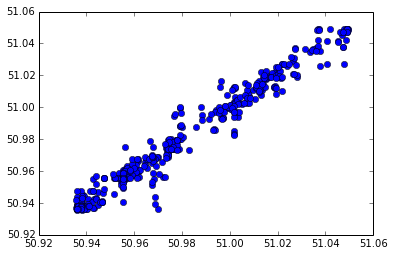

In [104]:
for i in mean_speeds_rounds:
    print(i)
    for j in i:
        print(j, " j ")
        x = j[0][0]
        x1 = j[0][1]
        
        y = j[1][0]
        y1 = j[1][1]
        #plt.plot(x, y, 'o', c = 'g')
        plt.plot(x1, y1, 'o', c = 'b')
        print(x, " j ")


66
65


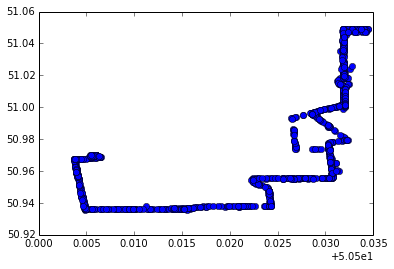

In [99]:
for i in mean_stays_rounds:
    xs, ys, ts = zip(*i)
    plt.plot(xs, ys, 'o', c = 'b')
print(len(xs))
print(len(speed[len(speed) - 1]))